# Proyek Klasifikasi Gambar: Intel Image
Nama: Nabilla Nurulita Dewi

Email: 

ID: git 




# Libraries

In [23]:
!pip install tensorflowjs

  Using cached tensorflowjs-4.22.0-py3-none-any.whl.metadata (3.2 kB)
  Using cached tensorflow_decision_forests-1.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.3 kB)
  Using cached packaging-23.2-py3-none-any.whl.metadata (3.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 23.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf


In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import time
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

# Data Preparation

Dataset didapatkan dari Kaggle berjudul Intel Image Dataset: https://www.kaggle.com/datasets/puneet6060/intel-image-classification/data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Dicoding/klasifikasi_gambar/intel_dataset.zip" -d "/content/drive/MyDrive/Dicoding/klasifikasi_gambar/"


In [5]:
import os

train_dir = os.path.abspath("/content/drive/MyDrive/Dicoding/klasifikasi_gambar/dataset/seg_train")
test_dir = os.path.abspath("/content/drive/MyDrive/Dicoding/klasifikasi_gambar/dataset/seg_test")

print("Isi folder train:")
print(os.listdir(train_dir))

print("\nIsi folder test:")
print(os.listdir(test_dir))


Isi folder train:
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

Isi folder test:
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [ ]:
from PIL import Image
import os

def print_images_resolution(directory):
    unique_sizes = set()
    total_images = 0

    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)

        if not os.path.isdir(subdir_path):
            continue

        image_files = os.listdir(subdir_path)
        num_images = len(image_files)
        print(f"{subdir}: {num_images} images")
        total_images += num_images

        for img_file in image_files:
            img_path = os.path.join(subdir_path, img_file)

            try:
                with Image.open(img_path) as img:
                    unique_sizes.add(img.size)
            except Exception as e:
                print(f"Error membaca {img_file}: {e}")

        print("Unique image sizes:")
        for size in unique_sizes:
            print(f"- {size}")
        print("---------------")

    print(f"\nTotal images: {total_images}")

In [ ]:
print_images_resolution(train_dir)

buildings: 2191 images
Unique image sizes:
- (150, 124)
- (150, 150)
---------------
forest: 2271 images
Unique image sizes:
- (150, 136)
- (150, 113)
- (150, 135)
- (150, 115)
- (150, 150)
- (150, 124)
- (150, 108)
- (150, 133)
---------------
glacier: 2404 images
Unique image sizes:
- (150, 136)
- (150, 142)
- (150, 105)
- (150, 102)
- (150, 108)
- (150, 111)
- (150, 120)
- (150, 123)
- (150, 135)
- (150, 150)
- (150, 110)
- (150, 113)
- (150, 119)
- (150, 76)
- (150, 134)
- (150, 143)
- (150, 146)
- (150, 149)
- (150, 97)
- (150, 115)
- (150, 124)
- (150, 133)
---------------
mountain: 2512 images
Unique image sizes:
- (150, 136)
- (150, 81)
- (150, 145)
- (150, 142)
- (150, 105)
- (150, 102)
- (150, 108)
- (150, 111)
- (150, 120)
- (150, 123)
- (150, 135)
- (150, 141)
- (150, 144)
- (150, 150)
- (150, 147)
- (150, 110)
- (150, 113)
- (150, 119)
- (150, 131)
- (150, 76)
- (150, 134)
- (150, 143)
- (150, 146)
- (150, 149)
- (150, 100)
- (150, 97)
- (150, 103)
- (150, 115)
- (150, 124

In [ ]:
print_images_resolution(test_dir)

buildings: 437 images
Unique image sizes:
- (150, 150)
---------------
forest: 474 images
Unique image sizes:
- (150, 141)
- (150, 150)
---------------
glacier: 553 images
Unique image sizes:
- (150, 149)
- (150, 110)
- (150, 141)
- (150, 76)
- (150, 150)
- (150, 72)
---------------
mountain: 525 images
Unique image sizes:
- (150, 149)
- (150, 110)
- (150, 81)
- (150, 141)
- (150, 131)
- (150, 76)
- (150, 150)
- (150, 72)
---------------
sea: 510 images
Unique image sizes:
- (150, 149)
- (150, 110)
- (150, 81)
- (150, 141)
- (150, 131)
- (150, 76)
- (150, 150)
- (150, 72)
---------------
street: 501 images
Unique image sizes:
- (150, 149)
- (150, 110)
- (150, 81)
- (150, 141)
- (150, 131)
- (150, 76)
- (150, 150)
- (150, 72)
---------------

Total images: 3000


In [6]:
# Data Generator
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)



Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
print("Train class indices:", train_generator.class_indices)
print("Test class indices:", test_generator.class_indices)


Train class indices: {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
Test class indices: {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


# Modeling

In [7]:
# Pretrained VGG16 without top
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
vgg.trainable = False

# Model Sequential
model = Sequential()

# VGG16
model.add(vgg)

# Conv2D dan Pooling
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Classifier
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='softmax'))

# Compile
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6),
    ModelCheckpoint("best_vgg_model.h5", save_best_only=True, monitor='val_accuracy', mode='max')
]

In [9]:
# Compile
model.compile(
    optimizer=Adam(learning_rate=3e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 7, 7, 64)            │         294,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,018,758 (57.29 MB)

 Trainable params: 304,070 (1.16 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

# Evaluation & Visualization

In [10]:
start_time = time.time()  # Start timer

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=callbacks
)

end_time = time.time()  # End timer

total_time = end_time - start_time
print(f"Total training time: {total_time:.2f} seconds")
print(f"Total training time: {total_time/60:.2f} minutes")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.7069 - loss: 1.2703 

351/351 ━━━━━━━━━━━━━━━━━━━━ 5365s 15s/step - accuracy: 0.7073 - loss: 1.2685 - val_accuracy: 0.8991 - val_loss: 0.2798 - learning_rate: 3.0000e-04
Epoch 2/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 599ms/step - accuracy: 0.8927 - loss: 0.3252

351/351 ━━━━━━━━━━━━━━━━━━━━ 261s 744ms/step - accuracy: 0.8927 - loss: 0.3251 - val_accuracy: 0.9133 - val_loss: 0.2562 - learning_rate: 3.0000e-04
Epoch 3/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 588ms/step - accuracy: 0.9091 - loss: 0.2621

351/351 ━━━━━━━━━━━━━━━━━━━━ 257s 733ms/step - accuracy: 0.9091 - loss: 0.2621 - val_accuracy: 0.9151 - val_loss: 0.2442 - learning_rate: 3.0000e-04
Epoch 4/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 259s 738ms/step - accuracy: 0.9125 - loss: 0.2489 - val_accuracy: 0.9123 - val_loss: 0.2459 - learning_rate: 3.0000e-04
Epoch 5/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 262s 746ms/step - accuracy: 0.9276 - loss: 0.2104 - val_accuracy: 0.9133 - val_loss: 0.2532 - learning_rate: 3.0000e-04
Epoch 6/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 604ms/step - accuracy: 0.9404 - loss: 0.1709

351/351 ━━━━━━━━━━━━━━━━━━━━ 266s 757ms/step - accuracy: 0.9404 - loss: 0.1709 - val_accuracy: 0.9162 - val_loss: 0.2372 - learning_rate: 1.5000e-04
Epoch 7/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 582ms/step - accuracy: 0.9377 - loss: 0.1707

351/351 ━━━━━━━━━━━━━━━━━━━━ 257s 732ms/step - accuracy: 0.9376 - loss: 0.1707 - val_accuracy: 0.9212 - val_loss: 0.2381 - learning_rate: 1.5000e-04
Epoch 8/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 288s 822ms/step - accuracy: 0.9422 - loss: 0.1593 - val_accuracy: 0.9205 - val_loss: 0.2401 - learning_rate: 1.5000e-04
Epoch 9/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 602ms/step - accuracy: 0.9453 - loss: 0.1525

351/351 ━━━━━━━━━━━━━━━━━━━━ 262s 747ms/step - accuracy: 0.9453 - loss: 0.1526 - val_accuracy: 0.9251 - val_loss: 0.2284 - learning_rate: 7.5000e-05
Epoch 10/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 258s 734ms/step - accuracy: 0.9460 - loss: 0.1523 - val_accuracy: 0.9248 - val_loss: 0.2284 - learning_rate: 7.5000e-05
Epoch 11/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 252s 718ms/step - accuracy: 0.9449 - loss: 0.1534 - val_accuracy: 0.9155 - val_loss: 0.2542 - learning_rate: 7.5000e-05
Epoch 12/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 256s 728ms/step - accuracy: 0.9491 - loss: 0.1429 - val_accuracy: 0.9215 - val_loss: 0.2359 - learning_rate: 3.7500e-05
Epoch 13/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 256s 730ms/step - accuracy: 0.9548 - loss: 0.1300 - val_accuracy: 0.9240 - val_loss: 0.2412 - learning_rate: 3.7500e-05
Epoch 14/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 253s 721ms/step - accuracy: 0.9551 - loss: 0.1241 - val_accuracy: 0.9251 - val_loss: 0.2422 - learning_rate: 1.8750e-05
Epoch 15/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 265s 

In [11]:
# Evaluate Model
preds = model.predict(test_generator)
y_true = test_generator.classes
y_pred = np.argmax(preds, axis=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1369s 15s/step


In [12]:
labels = list(test_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=labels))

              precision    recall  f1-score   support

   buildings       0.92      0.92      0.92       437
      forest       0.99      0.99      0.99       474
     glacier       0.87      0.86      0.86       553
    mountain       0.89      0.85      0.87       525
         sea       0.94      0.98      0.96       510
      street       0.93      0.94      0.93       501

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



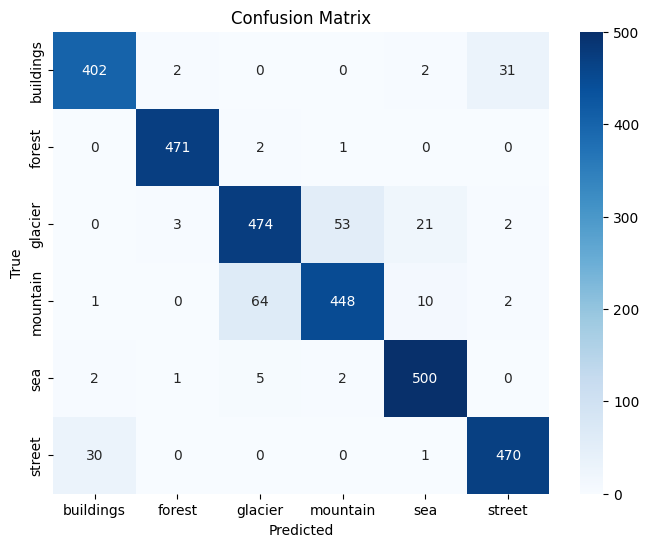

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


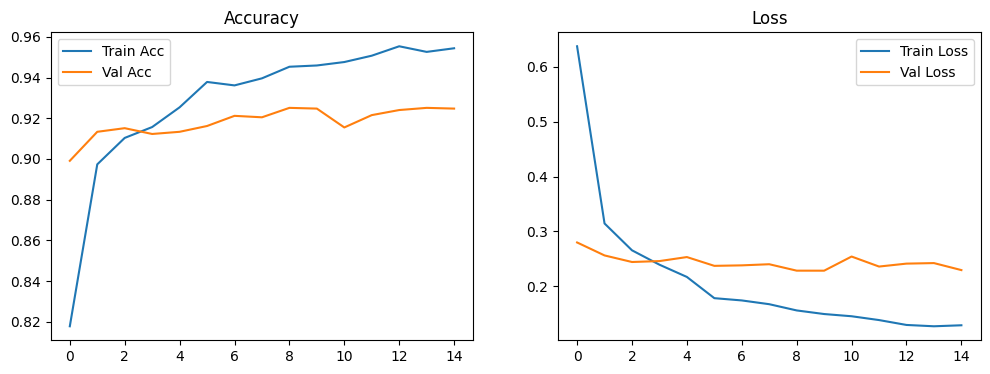

In [14]:
# Plot Training History
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.legend()
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.legend()
    plt.title('Loss')
    plt.show()

plot_training_history(history)

# Model Convertion

In [15]:
# Load model
model = tf.keras.models.load_model("/content/best_vgg_model.h5")

# Create output folder
os.makedirs("submission/saved_model", exist_ok=True)
os.makedirs("submission/tflite", exist_ok=True)

# Save model
model.export("submission/saved_model")


Saved artifact at 'submission/saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  133391220989136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133391220990672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133391220990096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133391220991440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133391220990864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133391220992208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133391220991632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133391220992976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133391220992400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133391220993744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1333912

## Convert to TFLite

In [16]:
# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save TFLite model
with open("submission/tflite/model.tflite", "wb") as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpdimi_lv3'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  133391220989136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133391220990672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133391220990096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133391220991440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133391220990864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133391220992208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133391220991632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133391220992976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133391220992400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133391220993744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1333912209931

In [17]:
# Class label
labels = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

with open("submission/tflite/label.txt", "w") as f:
    for label in labels:
        f.write(label + "\n")

## Convert to TFJS

In [1]:
!tensorflowjs_converter \
    --input_format=keras \
    /content/best_vgg_model.h5 \
    submission/tfjs_model/

2025-03-20 08:16:18.724969: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742458578.760528   49473 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742458578.771479   49473 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742458578.845666   49473 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742458578.846312   49473 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742458578.846336   49473 computation_placer.cc:177] computation placer alr

# Inference

/usr/local/lib/python3.11/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


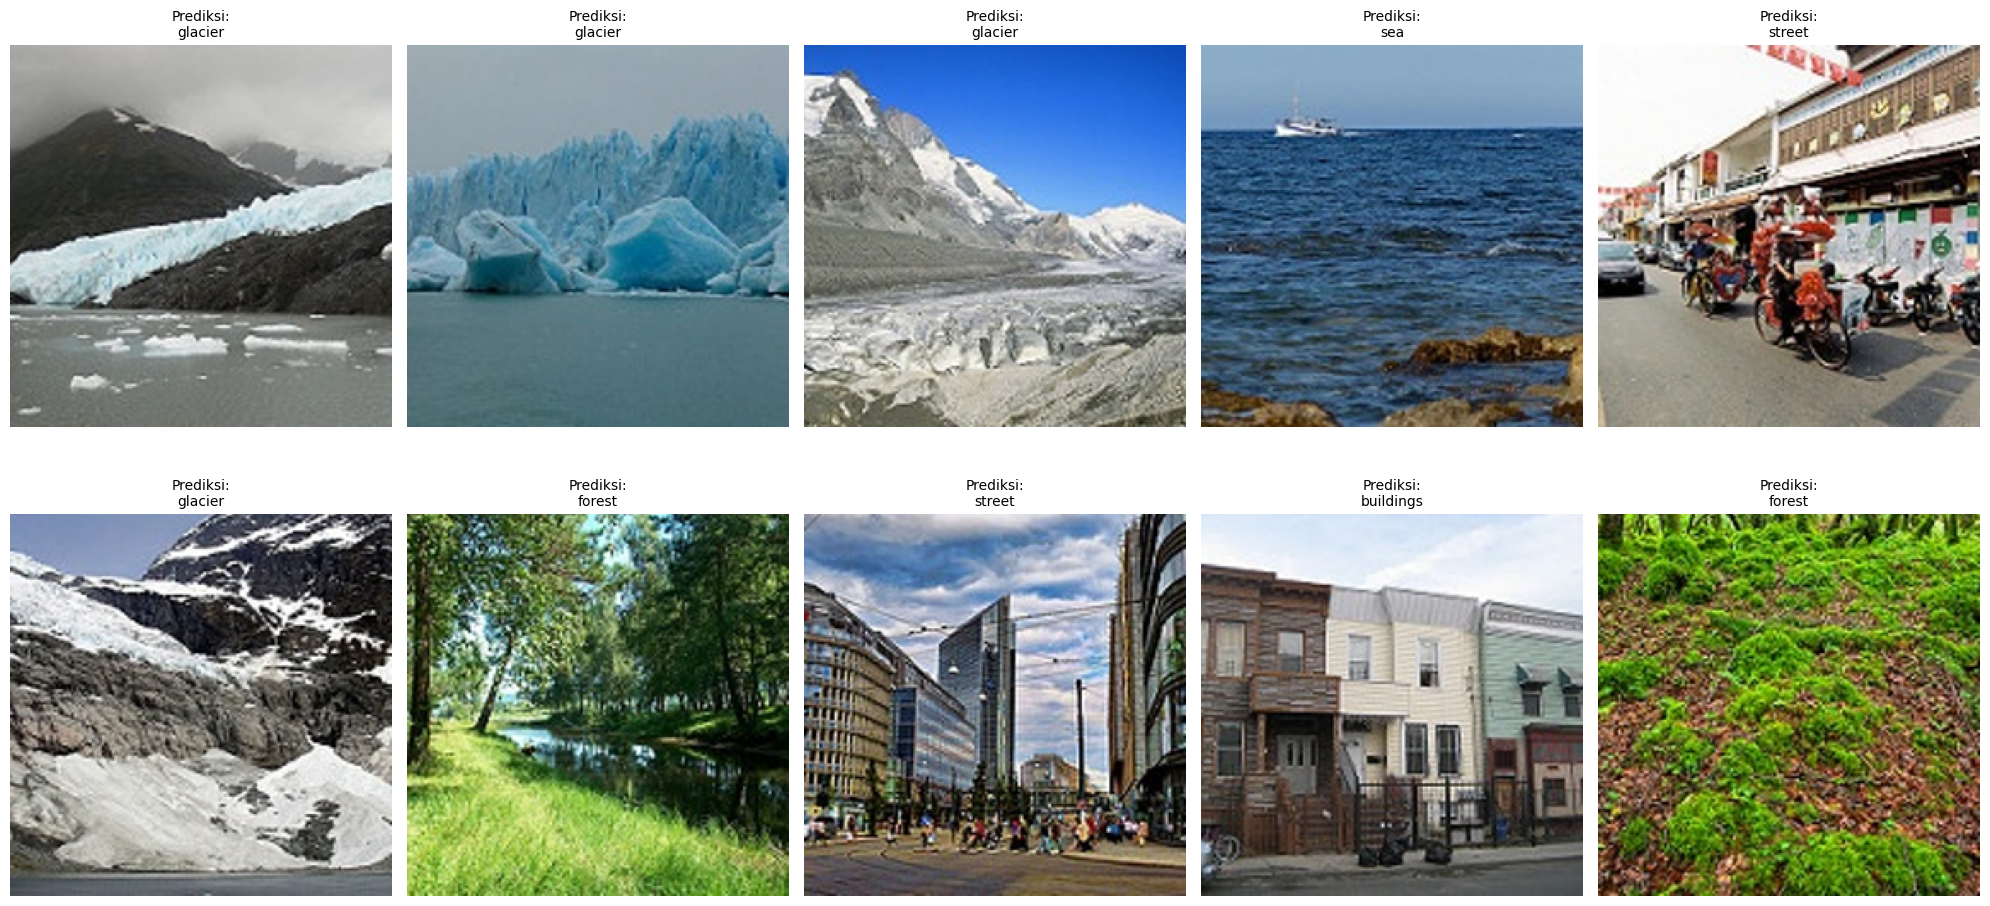

In [7]:
# Prediction data
base_folder = "/content/drive/MyDrive/Dicoding/klasifikasi_gambar/dataset/seg_pred"

# Pick 10 random images
all_image_paths = []
for root, dirs, files in os.walk(base_folder):
    for file in files:
        if file.lower().endswith((".jpg", ".jpeg", ".png")):
            all_image_paths.append(os.path.join(root, file))

sample_paths = random.sample(all_image_paths, k=10)

# Load model TFLite
interpreter = tf.lite.Interpreter(model_path="submission/tflite/model.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Load label
with open("submission/tflite/label.txt", "r") as f:
    labels = f.read().splitlines()

# Plot the results
plt.figure(figsize=(20, 10))
for i, img_path in enumerate(sample_paths):
    img = Image.open(img_path).resize((224, 224))
    img_array = np.array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0).astype(np.float32)

    interpreter.set_tensor(input_details[0]['index'], img_array)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details[0]['index'])

    predicted_class = np.argmax(output)

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Prediksi:\n{labels[predicted_class]}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Requirements

In [8]:
pip freeze > requirements.txt